In [3]:
!pip install tensorflow # installing tensor flow

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:09<00:00, 58.5MB/s]
100% 1.06G/1.06G [00:09<00:00, 125MB/s] 


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
#Using Generators to increase efficiency
#Train data
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,

)
#Test Data
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)




Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#Scaling the number using normalisation
def scl(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label
train_ds = train_ds.map(scl)
validation_ds = validation_ds.map(scl)

In [10]:
model = Sequential()
#First Layer
model.add(Conv2D(32,kernel_size=(3,3),padding = "valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

#Second Layer

model.add(Conv2D(64,kernel_size=(3,3),padding = "valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

#Third Layer
model.add(Conv2D(128,kernel_size=(3,3),padding = "valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

#Flatten output and add dense layer
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Checking summary to know the model structure
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,425 (56.64 MB)

 Trainable params: 14,847,361 (56.64 MB)

 Non-trainable params: 64 (256.00 B)

In [12]:
#Training Model
model.compile(optimizer='adam', loss = 'BinaryCrossentropy', metrics = ["binary_accuracy"])
history = model.fit(train_ds,epochs=9,validation_data=validation_ds)

Epoch 1/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 83ms/step - binary_accuracy: 0.6112 - loss: 0.8291 - val_binary_accuracy: 0.5624 - val_loss: 0.6671
Epoch 2/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 77ms/step - binary_accuracy: 0.7136 - loss: 0.5501 - val_binary_accuracy: 0.7256 - val_loss: 0.5398
Epoch 3/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - binary_accuracy: 0.7760 - loss: 0.4649 - val_binary_accuracy: 0.6778 - val_loss: 0.5954
Epoch 4/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - binary_accuracy: 0.8493 - loss: 0.3399 - val_binary_accuracy: 0.7118 - val_loss: 0.6723
Epoch 5/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - binary_accuracy: 0.9113 - loss: 0.2206 - val_binary_accuracy: 0.7422 - val_loss: 0.7830
Epoch 6/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - binary_accuracy: 0.9524 - loss: 0.1255 - val_binary_accuracy: 0.7532 - val_loss: 0.8347
Epoch 7/9
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - binary_accuracy: 0.9646 - loss: 0.0954 - val_binary_accuracy: 0.7188 - val_loss: 1.0684

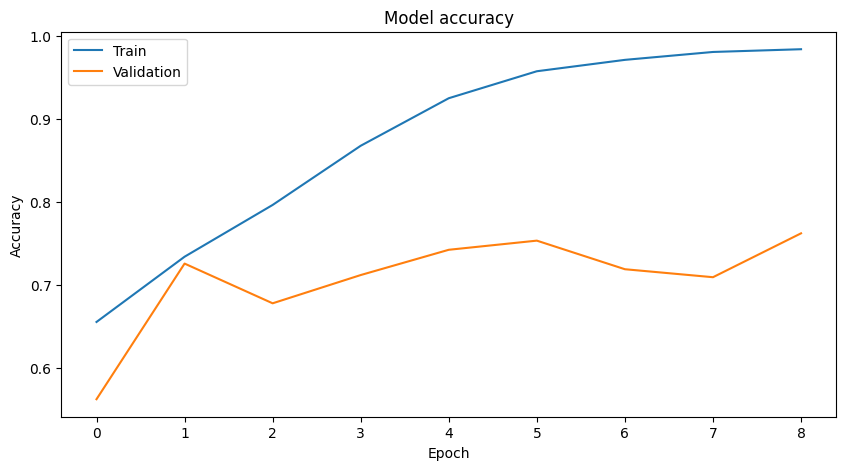

In [13]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()